try to build the most sophisticated decision tree, then build a simple random forrest, compare

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
path = "/Users/jiahuiguo/Documents/GitHub/Thinkful/Thinkful_Practice/Bootcamp/Data/ny_crime_2014.xls"

df = pd.DataFrame(pd.read_excel(path, skiprows = 4))
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1851.0,0.0,0.0,NaN,0.0,0.0,0.0,11.0,1.0,10.0,0.0,0.0
1,Addison Town and Village,2568.0,2.0,0.0,NaN,0.0,1.0,1.0,49.0,1.0,47.0,1.0,0.0
2,Afton Village4,820.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Akron Village,2842.0,1.0,0.0,NaN,0.0,0.0,1.0,17.0,0.0,17.0,0.0,0.0
4,Albany4,98595.0,802.0,8.0,54.0,NaN,237.0,503.0,3888.0,683.0,3083.0,122.0,12.0


In [10]:
df_use = df.rename(columns={ df.columns[2]: "violent_crime",df.columns[3]: "murder",
                    df.columns[4]: "rape",df.columns[5]: "rape2",
                    df.columns[7]: "A_assault",df.columns[8]: "property_crime",
                    df.columns[10]: "larceny_theft",df.columns[11]: "motor_theft"})

columns_to_drop = {"City", "violent_crime", "rape", "rape2", "A_assault"}
df_use = df_use.drop(columns_to_drop, axis =1).dropna()

df_use.head()

,Population,murder,Robbery,property_crime,Burglary,larceny_theft,motor_theft,Arson3
0,1851.0,0.0,0.0,11.0,1.0,10.0,0.0,0.0
1,2568.0,0.0,1.0,49.0,1.0,47.0,1.0,0.0
2,820.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2842.0,0.0,0.0,17.0,0.0,17.0,0.0,0.0
4,98595.0,8.0,237.0,3888.0,683.0,3083.0,122.0,12.0


In [12]:
df_use["arson_cat"] = np.where(df_use["Arson3"] != 0, 1, 0)
df_use = df_use.drop("Arson3", axis =1)
df_use.head()

,Population,murder,Robbery,property_crime,Burglary,larceny_theft,motor_theft,arson_cat
0,1851.0,0.0,0.0,11.0,1.0,10.0,0.0,0
1,2568.0,0.0,1.0,49.0,1.0,47.0,1.0,0
2,820.0,0.0,0.0,1.0,0.0,1.0,0.0,0
3,2842.0,0.0,0.0,17.0,0.0,17.0,0.0,0
4,98595.0,8.0,237.0,3888.0,683.0,3083.0,122.0,1


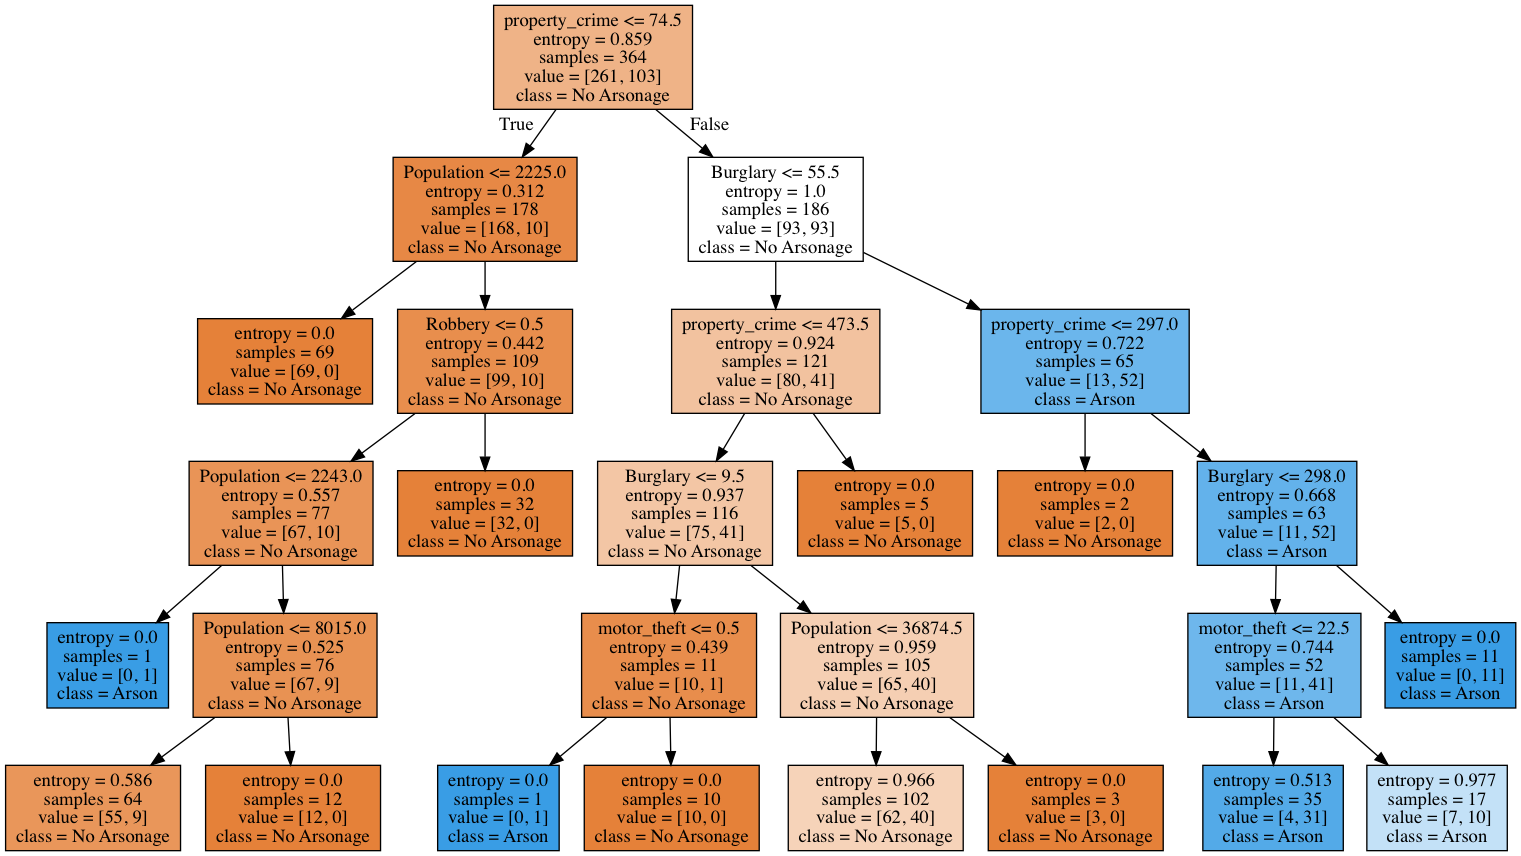

In [16]:
#fit our data to a decision tree
from sklearn import tree
from IPython.display import Image

import pydotplus
import graphviz


#initialize and fit the tree
decision_tree = tree.DecisionTreeClassifier(
    criterion="entropy",
    max_features=7, 
    max_depth=5,
    random_state=1789
)

X = df_use.drop("arson_cat", axis = 1)
Y = df_use["arson_cat"]

decision_tree.fit(X, Y)

#draw the tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=df_use.drop("arson_cat", axis = 1).columns,
    class_names=['No Arsonage', 'Arson'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [17]:
#let's see if our tree is any good
from sklearn.model_selection import cross_val_score
score = cross_val_score(decision_tree, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))



Unweighted Accuracy: 0.78 (+/- 0.13)


In [20]:
#the tree isn't too bad
#now let's see how a forrest would do huh
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()
score = cross_val_score(rfc, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


#it's not that far from the tree, a bit less accurate but less variance also

Unweighted Accuracy: 0.75 (+/- 0.10)
